# Decision Tree

Based on **Patric Loeber** videos: https://www.youtube.com/watch?v=jVh5NA9ERDA & https://www.youtube.com/watch?v=Bqi7EFFvNOg

## Concept

A decision tree is a very simple but powerful concept. The idea is to build a tree that splits our data such that we have the best separation of our classes. A decision tree is also the basis for the very popular random forest model.

## PERSON WALKING?

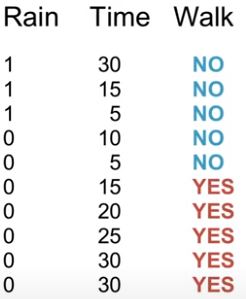

### Notes

Let's say that we want to predict if a person is walking or taking the bus to go to work and we have 10 observations/ samples with 2 different features. We have the feature if it is raining and the feature how much time do they have. We have also the prediction or the class label yes or no. 

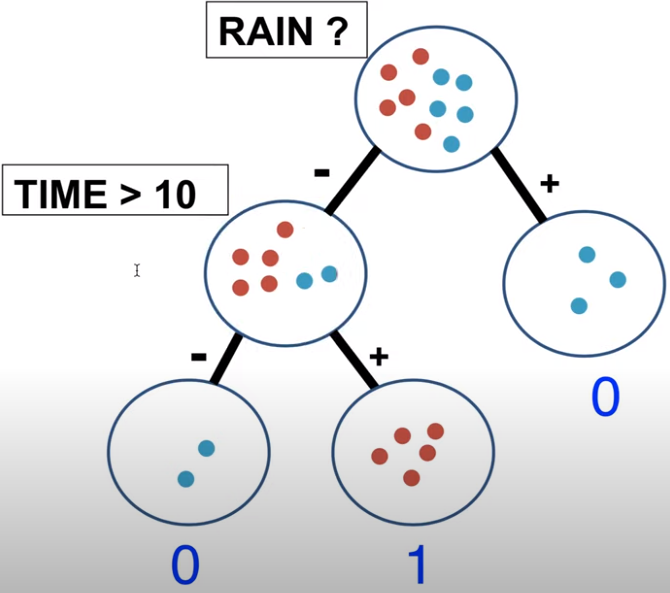

### Notes

We want to build our tree that splits our data so we put all the samples in the root node. Then we apply a question, so we ask if it is raining. If the answer is yes then we go to the right and we put all the samples where the answer is yes into the right node and if the answer is no then we go to the left and put all other samples in the left  node. On the first right node we can immediately say that the answer is no. They don't walk so we put/ return the class label 0. On the left we can further split the data and grow our tree so we asked the next question. Do they have more than 10 minutes. If the answer is yes then we go to the right and put all of the samples that have more than 10 minutes in the right node and all the other ones in the left node and then again we can say that answer is yes or the class label is 1 on the right side and the answer is 0 on the left side.

We could also stop with the growing after first question and return the most common class label. So for example if we would stop growing after first split we could say that it is more likely that they will walk but we could also further split our date. But we don't want to grow our data too much because we don't want to overfit our data. We also want to have a good prediction.

The only thing that we have to find out is at which node we want to apply which question. Why do we ask for rain at first and not for the time and why do we ask for the time is greater than 10 and why don't we ask for if it's greater than 5 or greater than 20. This is the so-called best split feature and best split value or split threshold that we want to find out. The concept is that at each node, we aim to identify the optimal split value and split threshold, and then store them for future use. This is our training phase and later when we want to predict a new test sample. We start at the top and then we traverse our tree and apply the questions or the features that we store and go to the left or to the right untill we reach a leaf node. A leaf node is the node at the bottom. Then we apply the most common label that we start based on our test samples.

## Entropy

$ E = - \sum p(X) \cdot log_{2}(p(X)) $

$ p(X) = \large \frac{\#x}{n} $

### Notes

to find the best split we calculate the entropy. The entropy is also the measure for uncertainty. The formula is minus and then we ave the sum of p(X) times log of p(X). p(X) is the number of occurrences over the total number of samples.

## Example

$ S = [0,0,0,0,0,1,1,1,1,1] $
$ \\ E = -\frac{5}{10} \cdot log_{2}(\frac{5}{10}) - \frac{5}{10} \cdot log_{2}(\frac{5}{10}) = -0.5log_{2}(-0.5) - 0.5log_{2}(-0.5) = 1 $

$ E = -0.5 \cdot (-1) - 0.5 \cdot (-1) = 1 $

## Information Gain

$ IG = E(parent) - [weighted \ average] \cdot E(children) $

### Notes

We calculate the entropy and then we split our data and calculate the entropy for our child's and then we calculate how much information we gain through this split. This measure is called information gain and it's calculated by the entropy of the  parent minus a weighted average of all the child entropies.

## Example

$ S = [0,0,0,0,0,1,1,1,1,1], \ S1 = [0,0,1,1,1,1,1], \ S2 = [0,0,0] $

$ IG = E(S) - [(7/10) \cdot E(S1) + (3/10) \cdot E(S2)] $

$ IG = 1 - [(7/10) \cdot 0.863 + (3/10) \cdot 0] = 0.395 $

### Notes

Like in our example we have the root node with 10 observations and then on the left side we have 7 observations, 2 zeros and 5 ones. On the right side we have 3 zeros. So our entropy is the entrpy of the parent minu 7 over 10 times the entropy on the left side plus 3 over 10 times the entropoy ofthe right side. This is the information gain. And now we do a greedy search, so we go over all posible features and all the possible feature values or thresholds so for rain we check if it is  1 or 0 and for the time feature we check for 5, 10, 15, 20, 25 and 30. So we do a greedy search and then select and store the best feature and the best threshold.

## Approach

**Train algorithm := Build the tree**

+ Start at the top node and at each node select the best split based on the best information gain.
+ Greedy search: Loop over all features and over all thresholds (all possible feature values).
+ Save the best split feature and split threshold at each node.
+ Build the tree recursively
+ Apply some stopping criteria to stop growing e.g. here: maximum depth, minimum samples at node, no more class distribution in node.
+ When we have a leaf node, store the most common class label of this node

**Predict := Traverse tree**

+ Traverse the tree recursively.
+ At each node look at the best split feature of the test feature vector x and go left or right depending on x[feature_idx] <= threshold
+ When we reach 

In [14]:
import numpy as np
from collections import Counter

# function which calculates entropy
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# helper class, we store here information about our node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None
    
class DecisionTree:
    
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
        
    def fit(self, X, y):
        # grow tree
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        # stopping criteria
        if (depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
       
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        
        # greedy search
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)
        
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent entropy
        parent_entropy = entropy(y)
        
        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        # weighted avf child entropy
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        # return information gain
        ig = parent_entropy - child_entropy
        return ig
        
    def _split(self, X_column, split_thresh):
        # we want 1d vector
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
        
    def predict(self, X):
        #traverse tree
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        
    def _most_common_label(self, y):
        counter = Counter(y)
        # returns list of tuples,
        # we want to have first element of the list
        # and from the first tuple we want the first element
        most_common = counter.most_common(1)[0][0]
        return most_common

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9210526315789473
